In [1]:
#import needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [3]:
#I Use Pandas to create my DataFrames using the two variables where I loaded the data.
red = pd.read_csv(url_wine_red, delimiter=";")
white = pd.read_csv(url_wine_white, delimiter=";")

wine_red = pd.DataFrame(red)
wine_white = pd.DataFrame(white)

In [4]:
wine_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Combine both DataFrames

Include a variable called category in each DataFrame that indicates whether the wine is red (red) or white (white). This will help to distinguish the type of wine in each row/record when merging the DataFrames.

In [6]:
red['category']='wine_red'
white['category']='wine_white'

In [7]:
#Use Pandas to join both records from the two DataFrames.
total_wine = pd.concat([wine_white, wine_red], ignore_index=True)
total_wines = pd.DataFrame(total_wine)

In [11]:
#Verify that the DataFrame is complete by viewing its first rows. 
total_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,wine_white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,wine_white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,wine_white


Initial data exploration and validation

In [19]:
#Get the number of rows and columns of the DataFrame.
rows_wine_red = len(wine_red.axes[0])
columns_wine_red = len(wine_red.axes[1])

rows_wine_white = len(wine_white.axes[0])
columns_wine_white = len(wine_white.axes[1])


print(rows_wine_red)
print(columns_wine_red)

print('↑↑↓↓')

print(rows_wine_white)
print(columns_wine_white)

1599
13
↑↑↓↓
4898
13


In [20]:
total_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [22]:
#Calculate the descriptive statistics of the dataset.
total_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [23]:
#Create a variable where you will store the values of the quality column. Check its main descriptive statistics
quality_wine = total_wines['quality']
quality_wine

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [24]:
#Count the unique values of the quality variable. 
quality_wine.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [25]:
count_points = quality_wine.value_counts()
print(count_points)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


Creating quality categories will help us better understand how quality behaves in wines.
Three main groups (low, medium and high).

/Users/javi/opt/anaconda3/envs/testenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Calidad en Vinos')]

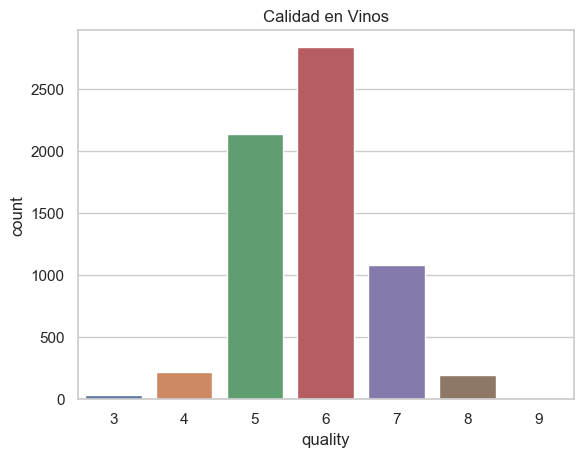

In [26]:
#Create a countplot graph of the quality variable to see the number of each quality value.
sns.set_theme(style="whitegrid")
sns.countplot(quality_wine).set(title='Calidad en Vinos')

In [27]:
#The following lambda function helps to add a column to the DataFrame where the quality category is indicated: 'Poor', 'Medium', 'High

total_wines['quality_category'] = total_wines['quality'].apply(lambda x : 'Poor' if x<5 else ('Medium' if x<8 else 'High'))
total_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,wine_red,Medium
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,wine_red,Medium
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,wine_red,Medium
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,wine_red,Medium
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,wine_red,Medium


In [28]:
#Redefine the variable type of the new column as type 'category
total_wines.quality_category = total_wines['quality_category'].astype('category')
total_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

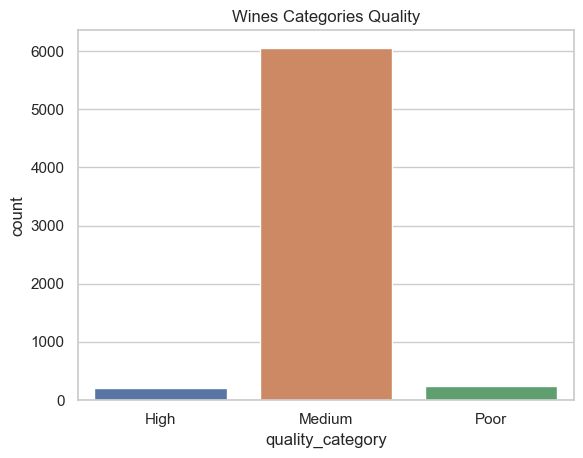

In [30]:
sns.set_theme(style="whitegrid")
graph_quality = sns.countplot(x="quality_category", data=total_wine).set(title='Wines Categories Quality')

WINE pH

Text(0.5, 1.0, 'pH Distribution')

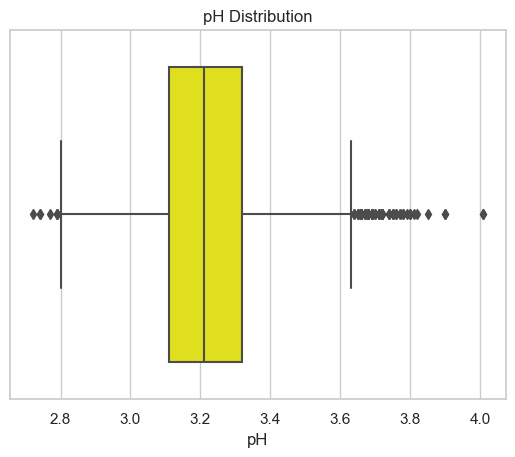

In [47]:
ph = total_wines['pH']
sns.boxplot(x=ph, color='yellow').set_title('pH Distribution')

Desnsity 

Text(0.5, 1.0, 'Density distribution')

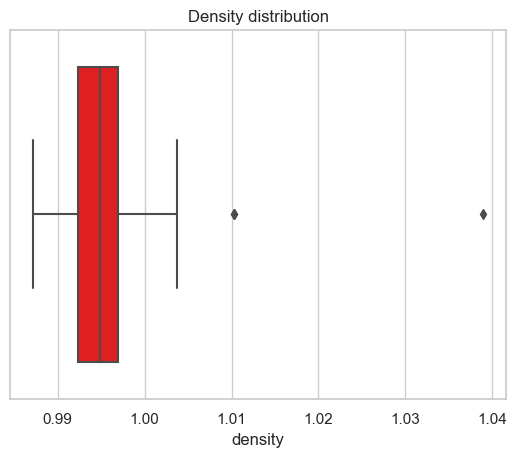

In [46]:
density = total_wines['density']
sns.boxplot(x=density, color='red').set_title('Density distribution')
     

Alcohol

Text(0.5, 1.0, 'Distribución del Alcohol')

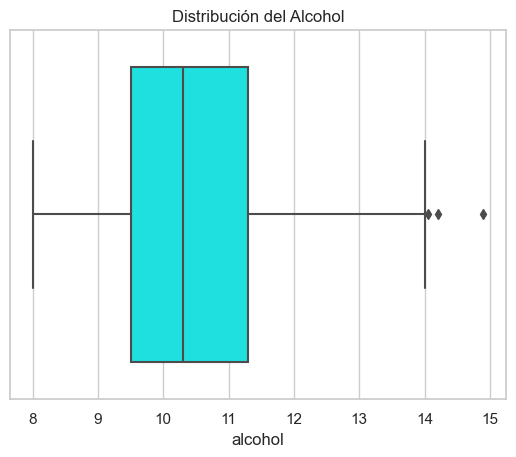

In [33]:
alcohol = total_wines['alcohol']
sns.boxplot(x=alcohol, color='cyan').set_title('Alcohol Distribution')

Residual Sugar

Text(0.5, 1.0, 'Sugar Distribution')

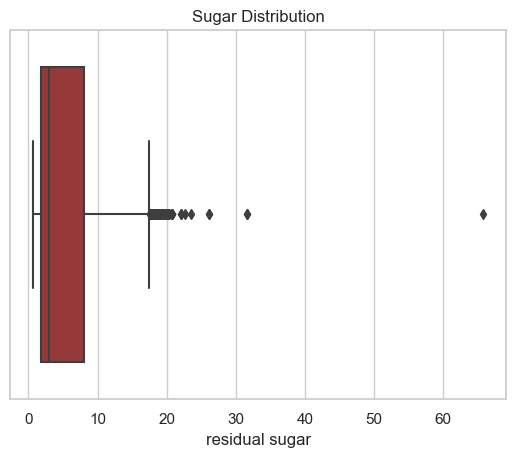

In [45]:
residual_sugar = total_wines['residual sugar']
sns.boxplot(x=residual_sugar, color='brown').set_title('Sugar Distribution')

Citric Acid 

Text(0.5, 1.0, 'Citric acid Distribution')

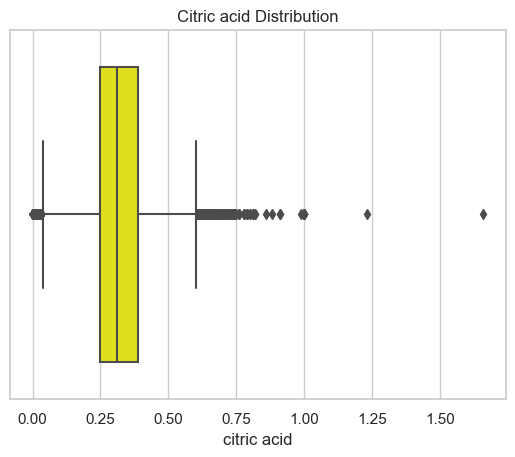

In [44]:
citric_acid = total_wines['citric acid']
sns.boxplot(x=citric_acid, color='yellow').set_title('Citric acid Distribution')

Volatile acidity

Text(0.5, 1.0, 'Volatile acidity distribution')

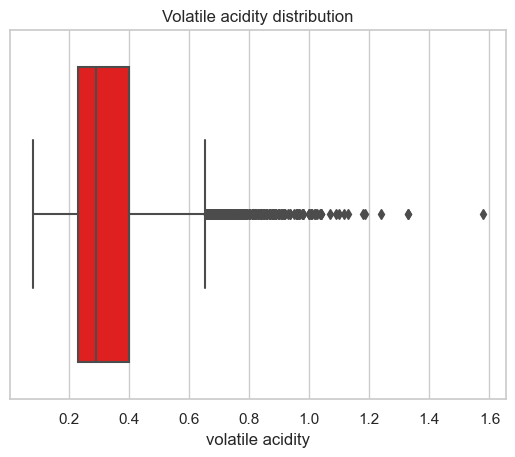

In [43]:
volatile_acidity = total_wines['volatile acidity']
sns.boxplot(x=volatile_acidity, color='red').set_title('Volatile acidity distribution')

Fixed acidity 

Text(0.5, 1.0, 'Fixed Acidity Distribution')

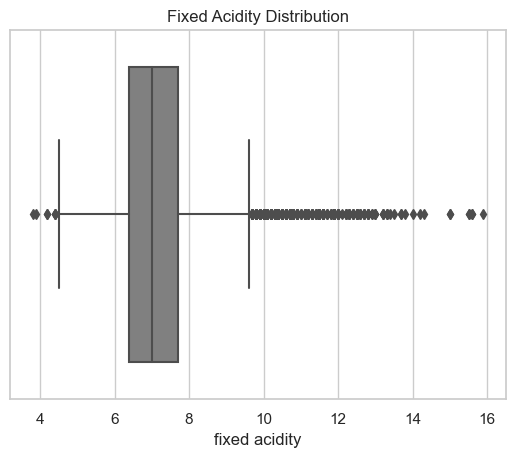

In [42]:
fixed_acidity = total_wines['fixed acidity']
sns.boxplot(x=fixed_acidity, color='grey').set_title('Fixed Acidity Distribution')

Chlorides

Text(0.5, 1.0, 'Chlorides Distribution')

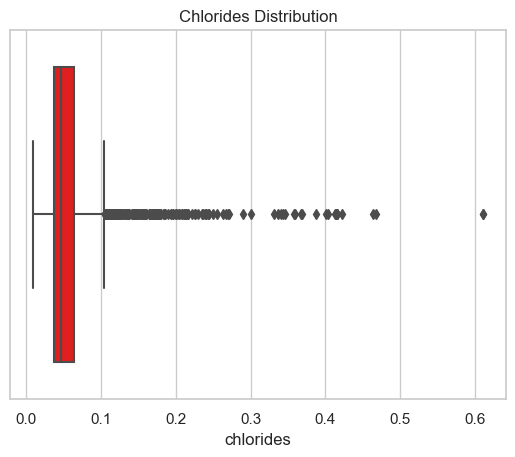

In [41]:
chlorides = total_wines['chlorides']
sns.boxplot(x=chlorides, color='red').set_title('Chlorides Distribution')

Free sulfur dioxide

Text(0.5, 1.0, 'Free Sulfur Dioxide Distribution')

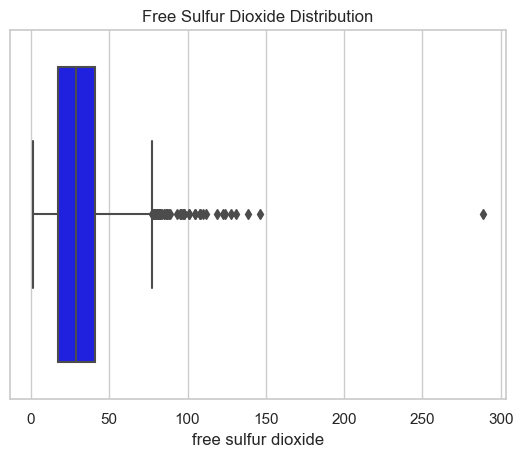

In [40]:
free_sulfur_dioxide = total_wines['free sulfur dioxide']
sns.boxplot(x=free_sulfur_dioxide, color='blue').set_title('Free Sulfur Dioxide Distribution')

Total sulfur dioxide

Text(0.5, 1.0, 'sulfur dioxide distribution')

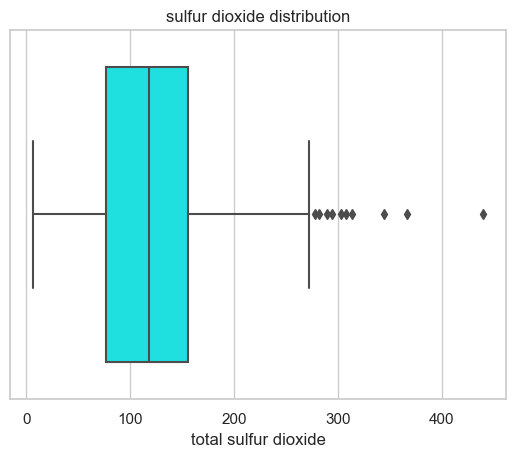

In [50]:
total_sulfure_dioxide = total_wines['total sulfur dioxide']
sns.boxplot(x=total_sulfure_dioxide, color='cyan').set_title('sulfur dioxide distribution')

Sulphates

Text(0.5, 1.0, 'Sulphates distribution')

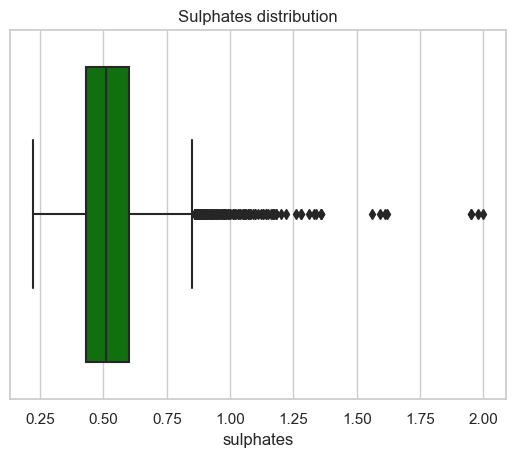

In [49]:
sulphates = total_wines['sulphates']
sns.boxplot(x=sulphates, color='green').set_title('Sulphates distribution')

In [51]:
#make a copy of the dataframe using the copy() method. 
#remove outliers, 

total_wines_copy = total_wines.copy()

In [52]:
#function to get the index
def outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR
    ls = df.index[(df[columna] < limite_inferior)  | (df[columna] > limite_superior)]
    return ls

In [ ]:
#save the columns that we want to delete 

indices_list = []

for columna in ['volatile acidity', 'residual sugar', 'chlorides']:
    indices_list.extend(outliers(total_wines_copy, columna))

print(len(indices_list))
print(indices_list, '\n')

In [54]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

total_wines_copy_clean = remove(total_wines_copy, indices_list)
total_wines_copy_clean.shape

(5772, 14)

In [55]:
total_wines_copy_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_category
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,wine_white,Medium
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,wine_white,Medium
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,wine_white,Medium
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,wine_white,Medium
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,wine_white,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,wine_red,Medium
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,wine_red,Medium
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,wine_red,Medium
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,wine_red,Medium


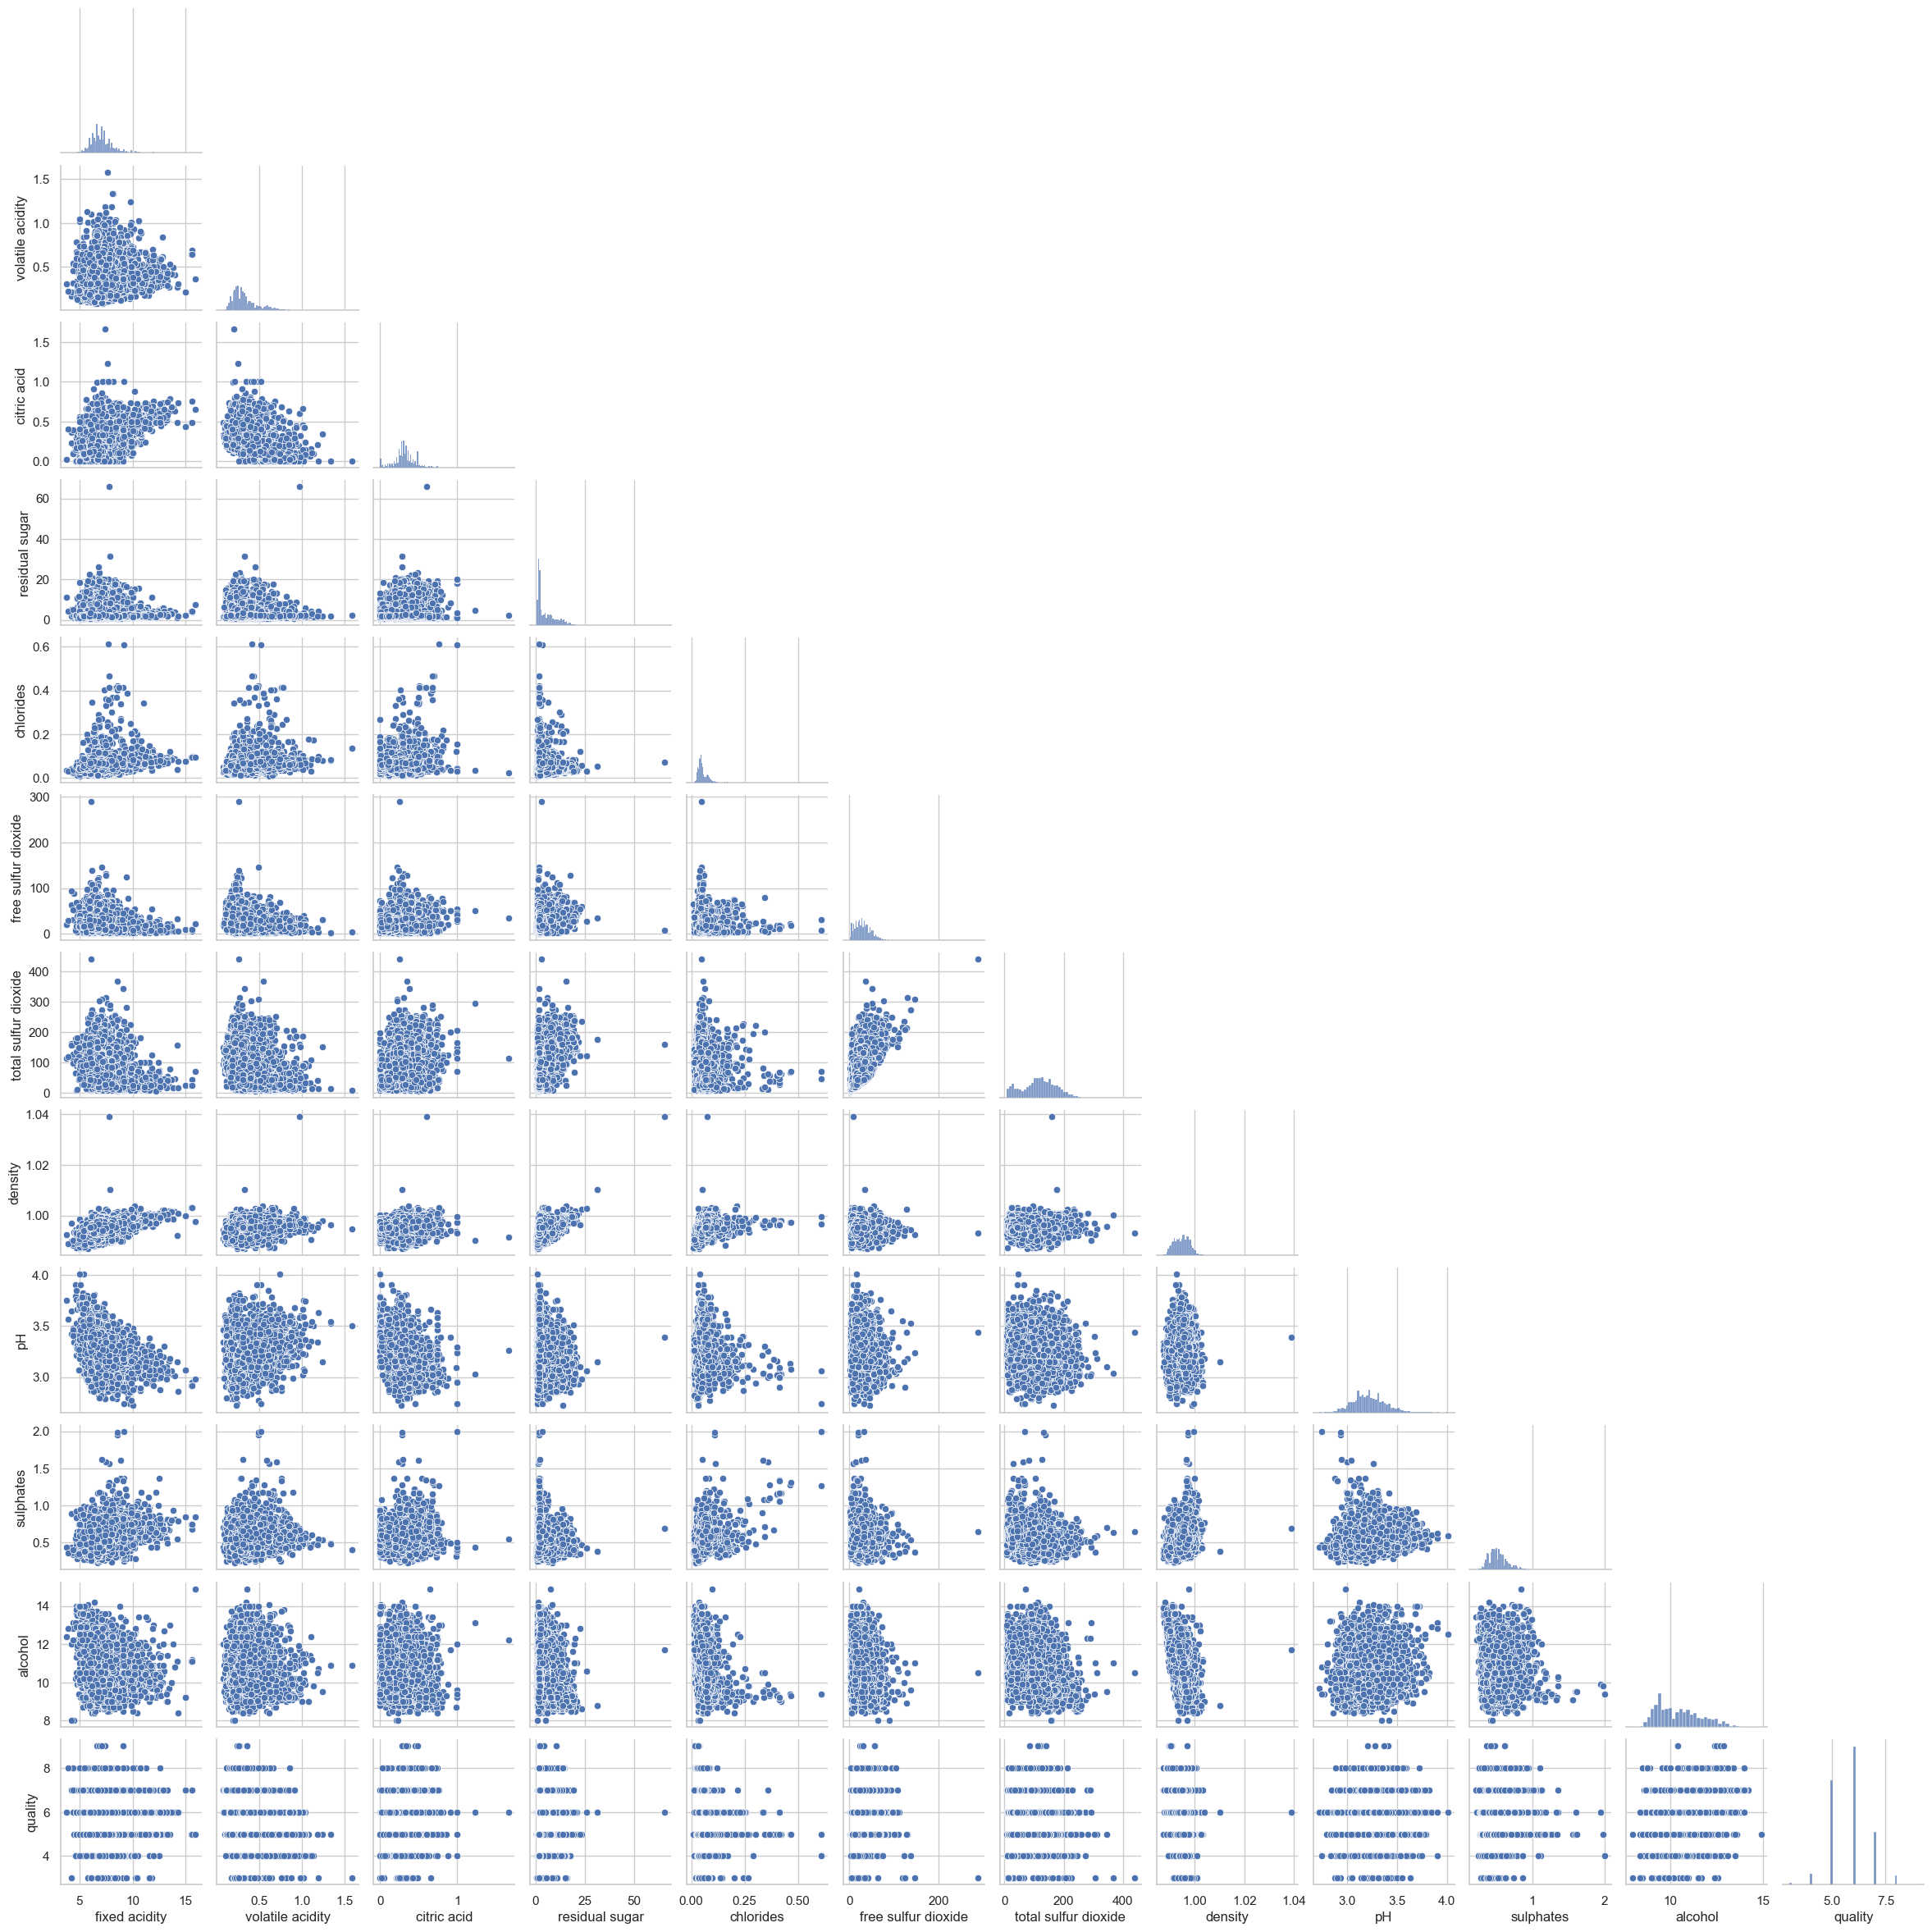

In [56]:
# Correlation analysis between variable
sns.pairplot(total_wines, corner=True, height=2)

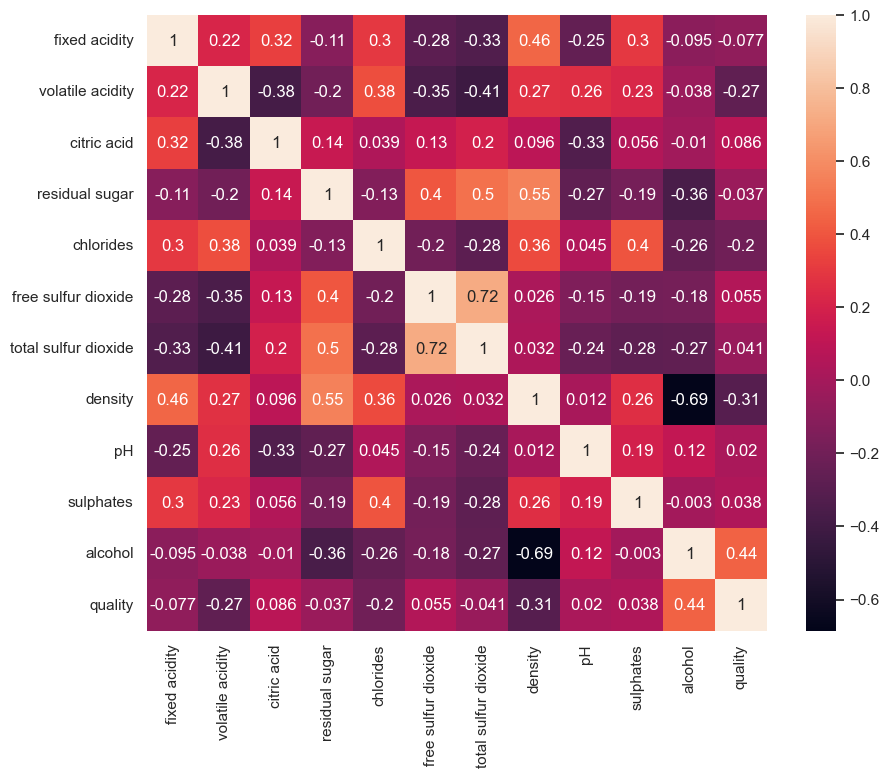

In [57]:
#Create a heatmap graph to better observe correlations between variables.

df_heatmap = total_wine.iloc[:, :12]
df_heatmap
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(df_heatmap.corr(), annot=True)

In [58]:
total_wines.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.444319
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


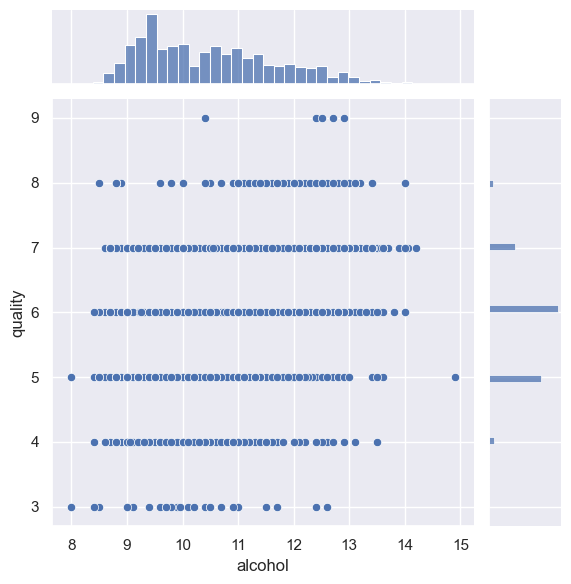

In [59]:
sns.jointplot(x = "alcohol", y = "quality", data = total_wines, kind = "scatter")

Text(0.5, 1.0, 'Alcohol & Quality')

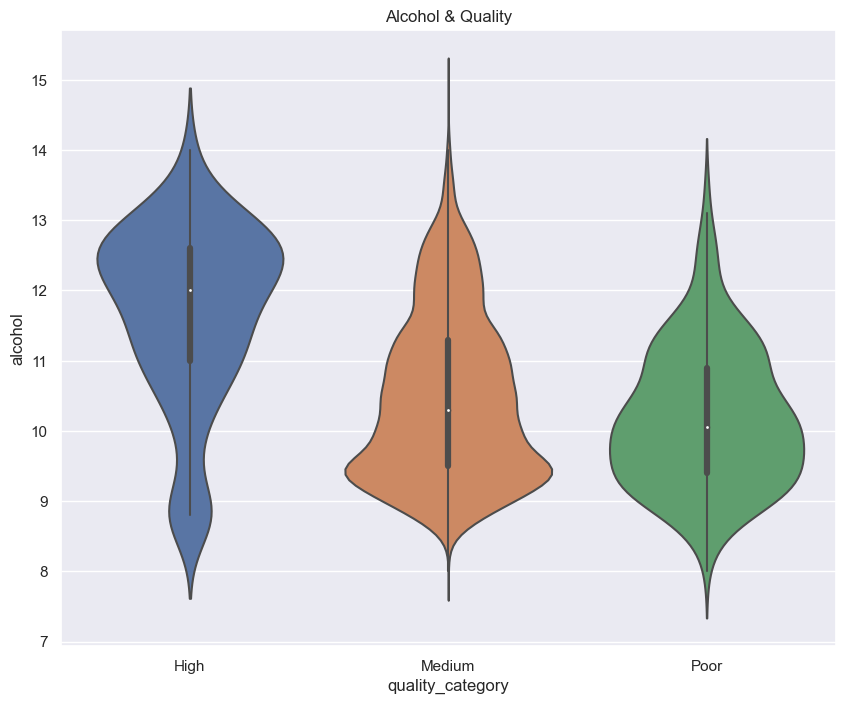

In [61]:
sns.violinplot(x="quality_category", y="alcohol", data=total_wine).set_title('Alcohol & Quality')

THANK YOU